In [238]:
import sys
!{sys.executable} -m pip install ta

In [239]:
import os
import pandas as pd
import ta

df = pd.read_csv("Resources/BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10
2197,2020-09-22,10459.624023,10568.077148,10382.726563,10538.459961,10538.459961,2.362179e+10


In [262]:
def label_dataset(t_horizon):
    for row in df.index:
        if row < len(df.index)-1:
            # Calculate the maximum value for the next t_horizon rows of high values.
            df.loc[row, f"Max_{t_horizon}"] = max(df.loc[(row + 1):(row + t_horizon), "High"]) 
            # Calculate the minimum value for the next t_horizon rows of low values.
            df.loc[row, f"Min_{t_horizon}"] = min(df.loc[(row+1):(row+t_horizon), "Low"])
            # Calculate the percentage gain from going long if exits at optimal price next 3 days
            df.loc[row, f"Max_{t_horizon}_Percent_Increase"] = ((df.loc[row, f"Max_{t_horizon}"] - df.loc[row, "Close"]) / df.loc[row, "Close"])
            # Calculate the percentage gain from going Short if exits at optimal price next 3 days 
            df.loc[row, f"Min_{t_horizon}_Percent_Increase"] = ((df.loc[row, "Close"] - df.loc[row, f"Min_{t_horizon}"]) / df.loc[row, "Close"])
            # What was the optimal move? (SHORT or LONG)
            df.loc[row, f"Choice_{t_horizon}"] = "LONG" if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else "SHORT"
            # What is the optimate gain?
            df.loc[row, f"Gain_{t_horizon}"] = df.loc[row, f"Max_{t_horizon}_Percent_Increase"] if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else df.loc[row, f"Min_{t_horizon}_Percent_Increase"]
label_dataset(3)
label_dataset(6)

In [263]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,p_ema_24,rsi_7,rsi_14,rsi_28,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
27,2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,3.849150e+07,402.226990,373.070007,0.003385,...,0.951992,71.956219,56.293392,48.558885,402.226990,373.070007,0.003385,0.069349,SHORT,0.069349
28,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,2.526710e+07,398.807007,373.070007,0.010219,...,0.969359,65.644923,53.755190,47.154156,398.807007,373.070007,0.010219,0.054976,SHORT,0.054976
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,2.699000e+07,395.157990,375.389008,0.032942,...,1.000291,54.475130,48.988694,44.480312,395.157990,375.389008,0.032942,0.018734,LONG,0.032942
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,1.360070e+07,395.157990,378.252014,0.029706,...,0.997385,55.347251,49.463490,44.799679,395.157990,356.446991,0.029706,0.071167,SHORT,0.071167
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,1.141680e+07,393.938995,378.252014,0.006379,...,0.979582,60.929485,52.506761,46.827403,393.938995,353.304993,0.006379,0.097427,SHORT,0.097427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2020-10-15,11426.602539,11569.914063,11303.603516,11495.349609,11495.349609,2.448723e+10,11540.061523,11223.012695,0.003890,...,0.959262,73.417209,64.233589,56.860672,NaN,NaN,NaN,NaN,NaN,NaN
2221,2020-10-16,11502.828125,11540.061523,11223.012695,11322.123047,11322.123047,2.563548e+10,11799.092773,11285.345703,0.042127,...,0.976024,58.527728,58.318147,54.548636,NaN,NaN,NaN,NaN,NaN,NaN
2222,2020-10-17,11322.123047,11386.261719,11285.345703,11358.101563,11358.101563,1.913043e+10,11960.771484,11057.008789,0.053061,...,0.975098,60.470315,59.159408,54.943243,NaN,NaN,NaN,NaN,NaN,NaN
2223,2020-10-18,11355.982422,11483.359375,11347.578125,11483.359375,11483.359375,1.828331e+10,11960.771484,11057.008789,0.041574,...,0.967304,66.788834,62.032452,56.312644,NaN,NaN,NaN,NaN,NaN,NaN


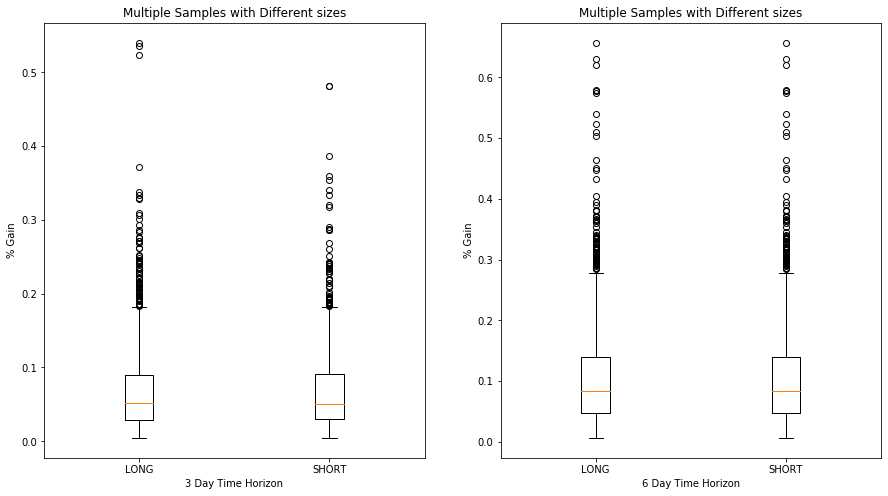

In [264]:
# Gains
gain_3_long = df[df["Choice_3"] == "LONG"]["Gain_3"]
gain_3_short = df[df["Choice_3"] == "SHORT"]["Gain_3"]
gain_6_long = df[df["Choice_6"] == "LONG"]["Gain_6"]
gain_6_short = df[df["Choice_6"] == "LONG"]["Gain_6"]

data = [gain_3_long, gain_3_short]
data_2 = [gain_6_long, gain_6_short]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data, labels = ["LONG","SHORT"])
ax1.set_xlabel("3 Day Time Horizon")
ax1.set_ylabel("% Gain")

ax2.set_title('Multiple Samples with Different sizes')
ax2.boxplot(data_2, labels = ["LONG","SHORT"])
ax2.set_xlabel("6 Day Time Horizon")
ax2.set_ylabel("% Gain")

plt.show()


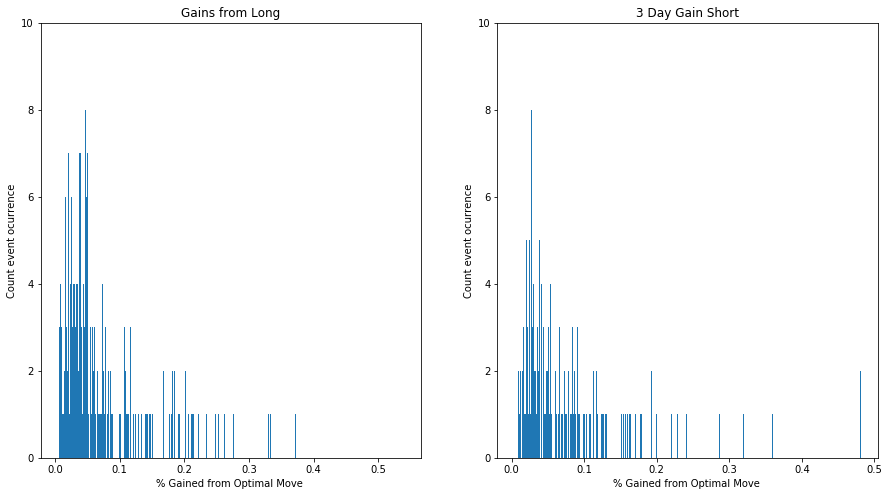

In [275]:
# Gains
gain_3_long = df[df["Choice_3"] == "LONG"]["Gain_3"]
gain_3_short = df[df["Choice_3"] == "SHORT"]["Gain_3"]
gain_6_long = df[df["Choice_6"] == "LONG"]["Gain_6"]
gain_6_short = df[df["Choice_6"] == "LONG"]["Gain_6"]

data = [gain_3_long, gain_3_short]
data_2 = [gain_6_long, gain_6_short]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.set_title('Gains from Long')
# ax1.boxplot(data, labels = ["LONG","SHORT"])
ax1.set_xlabel("% Gained from Optimal Move ")
ax1.set_ylabel("Count event ocurrence")
ax1.set_ylim(0,10)

ax2.set_title('3 Day Gain Short')
# ax2.boxplot(data_2, labels = ["LONG","SHORT"])
ax2.set_xlabel("% Gained from Optimal Move ")
ax2.set_ylabel("Count event ocurrence")
ax2.set_ylim(0,10)

N_points = 100000
n_bins = 2000

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
ax1.hist(gain_3_long, bins=n_bins)
ax2.hist(gain_3_short, bins=n_bins)

plt.show()

In [272]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,p_ema_24,rsi_7,rsi_14,rsi_28,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
27,2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,3.849150e+07,402.226990,373.070007,0.003385,...,0.951992,71.956219,56.293392,48.558885,402.226990,373.070007,0.003385,0.069349,SHORT,0.069349
28,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,2.526710e+07,398.807007,373.070007,0.010219,...,0.969359,65.644923,53.755190,47.154156,398.807007,373.070007,0.010219,0.054976,SHORT,0.054976
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,2.699000e+07,395.157990,375.389008,0.032942,...,1.000291,54.475130,48.988694,44.480312,395.157990,375.389008,0.032942,0.018734,LONG,0.032942
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,1.360070e+07,395.157990,378.252014,0.029706,...,0.997385,55.347251,49.463490,44.799679,395.157990,356.446991,0.029706,0.071167,SHORT,0.071167
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,1.141680e+07,393.938995,378.252014,0.006379,...,0.979582,60.929485,52.506761,46.827403,393.938995,353.304993,0.006379,0.097427,SHORT,0.097427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2020-10-15,11426.602539,11569.914063,11303.603516,11495.349609,11495.349609,2.448723e+10,11540.061523,11223.012695,0.003890,...,0.959262,73.417209,64.233589,56.860672,NaN,NaN,NaN,NaN,NaN,NaN
2221,2020-10-16,11502.828125,11540.061523,11223.012695,11322.123047,11322.123047,2.563548e+10,11799.092773,11285.345703,0.042127,...,0.976024,58.527728,58.318147,54.548636,NaN,NaN,NaN,NaN,NaN,NaN
2222,2020-10-17,11322.123047,11386.261719,11285.345703,11358.101563,11358.101563,1.913043e+10,11960.771484,11057.008789,0.053061,...,0.975098,60.470315,59.159408,54.943243,NaN,NaN,NaN,NaN,NaN,NaN
2223,2020-10-18,11355.982422,11483.359375,11347.578125,11483.359375,11483.359375,1.828331e+10,11960.771484,11057.008789,0.041574,...,0.967304,66.788834,62.032452,56.312644,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
# Clean NaN values
df = ta.utils.dropna(df)

In [274]:
# Exponential Moving Averages indicators
ema_6 = ta.trend.ema_indicator(close = df["Close"], n = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], n = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], n = 24)

# RSI indicators
rsi_14 = ta.momentum.RSIIndicator(df["Close"], n = 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], n = 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], n = 28)

# Create new columns based on the indicators
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

In [245]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,Gain_6,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,...,0.159188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,...,0.094025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,...,0.118443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,...,0.079855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,...,0.107156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2020-09-18,10951.820313,11034.908203,10829.657227,10944.585938,10944.585938,2.634190e+10,11134.092773,10380.260742,0.017315,...,0.051562,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629,62.123761,52.050299,51.523217
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,...,0.064365,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169,67.845442,54.970132,52.902128
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,...,0.051015,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756,57.317844,51.453646,51.324314
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,...,0.011909,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891,36.928573,42.519744,46.900117


In [246]:
df.dropna(inplace = True)

In [247]:
# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
# X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                           random_state=RANDOM_STATE)

X = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28"]]

y = df["Choice_3"]

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="auto",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate_test = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        oob_error_test = 1 - clf.score(X_test, y_test)
        error_rate_test[label].append((i, oob_error_test))

Automatically created module for IPython interactive environment


C:\Users\fjvan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fjvan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\fjvan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fjvan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\fjvan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

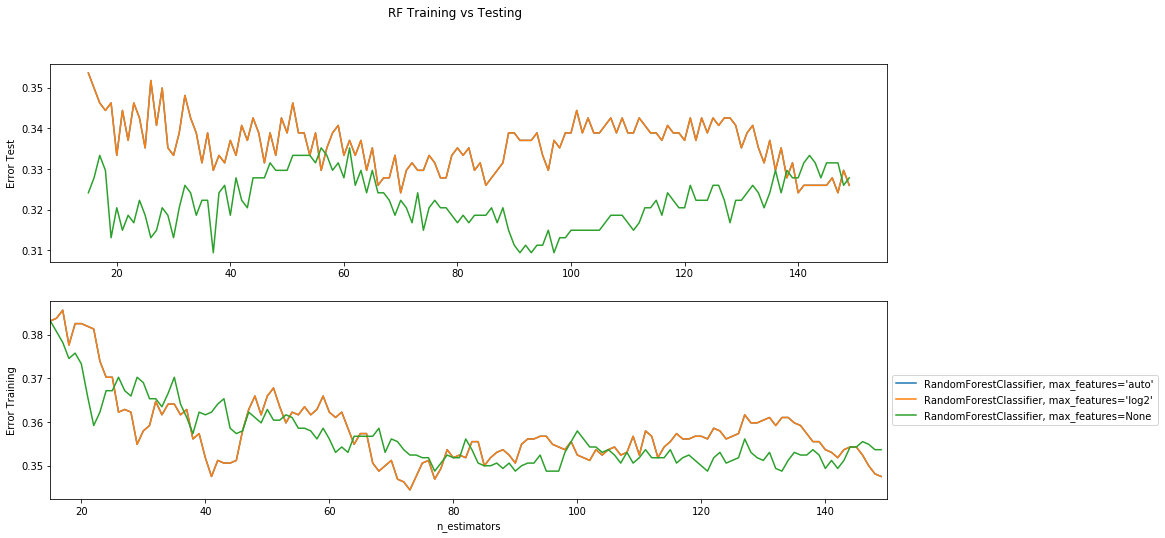

In [248]:
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle('RF Training vs Testing')

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate_test.items():
    xs, ys = zip(*clf_err)
    axs[0].plot(xs, ys, label=label)
    
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    axs[1].plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
axs[1].set_ylabel("Error Training")
axs[0].set_ylabel("Error Test")

# plt.legend(loc="outside")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0,0.40)
plt.show()



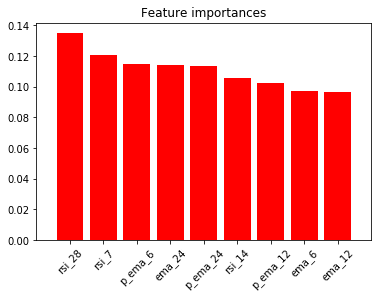

In [249]:
import numpy as np
labels = []
importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

columns = X.columns.values.tolist()

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation = 45)
plt.xlim([-1, X.shape[1]])

plt.xticks(ticks = range(X.shape[1]), labels = [columns[i] for i in indices])

plt.show()

In [250]:
# We can sort the features by their importance
indicator_ranking = sorted(zip(clf.feature_importances_, columns), reverse=True)
indicator_ranking

[(0.1350451157718322, 'rsi_28'),
 (0.12099033812429572, 'rsi_7'),
 (0.11458847275876577, 'p_ema_6'),
 (0.11389098941380349, 'ema_24'),
 (0.11350446129347855, 'p_ema_24'),
 (0.10578274020142124, 'rsi_14'),
 (0.10235972298382437, 'p_ema_12'),
 (0.09743072965126084, 'ema_6'),
 (0.09640742980131774, 'ema_12')]

In [251]:
print(f"The error rate of our model is: {clf.oob_score_}")

The error rate of our model is: 0.6463714637146372


In [252]:
x = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28"]]
x["model_predictions"] = clf.predict(x)
x["target_values"] = y

C:\Users\fjvan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fjvan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [253]:
x

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,model_predictions,target_values
27,379.306277,372.884433,381.625049,0.946208,0.930188,0.951992,71.956219,56.293392,48.558885,SHORT,SHORT
28,383.725343,376.251907,382.676886,0.972015,0.953084,0.969359,65.644923,53.755190,47.154156,SHORT,SHORT
29,383.391245,377.221767,382.667215,1.002183,0.986056,1.000291,54.475130,48.988694,44.480312,LONG,LONG
30,383.496031,378.227341,382.754478,0.999317,0.985588,0.997385,55.347251,49.463490,44.799679,LONG,LONG
31,385.766304,380.260363,383.449478,0.985501,0.971435,0.979582,60.929485,52.506761,46.827403,SHORT,SHORT
...,...,...,...,...,...,...,...,...,...,...,...
2193,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629,62.123761,52.050299,51.523217,SHORT,SHORT
2194,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169,67.845442,54.970132,52.902128,SHORT,SHORT
2195,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756,57.317844,51.453646,51.324314,SHORT,SHORT
2196,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891,36.928573,42.519744,46.900117,LONG,LONG


In [254]:
df_2 = df.copy()

df = pd.read_csv("Resources/BTC-USD-Present.csv")

# Function to label the data frame
label_dataset(3)

# Exponential Moving Averages indicators
ema_6 = ta.trend.ema_indicator(close = df["Close"], n = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], n = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], n = 24)

# RSI indicators
rsi_14 = ta.momentum.RSIIndicator(df["Close"], n = 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], n = 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], n = 28)

# Create new columns based on the indicators
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

# Clean NaN values
df = ta.utils.dropna(df)

x = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28"]]
x["model_predictions"] = clf.predict(x)
x["target_values"] = df["Choice_3"]
x["Date"] = df["Date"]

C:\Users\fjvan\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fjvan\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fjvan\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [255]:
print()
print(str('2014-10-14') in df_2["Date"].tolist())
real_dates = [i for i in x["Date"].tolist() if str(i) not in df_2["Date"].tolist()]
real_dates


True


['2020-09-23',
 '2020-09-24',
 '2020-09-25',
 '2020-09-26',
 '2020-09-27',
 '2020-09-28',
 '2020-09-29',
 '2020-09-30',
 '2020-10-01',
 '2020-10-02',
 '2020-10-03',
 '2020-10-04',
 '2020-10-05',
 '2020-10-06',
 '2020-10-07',
 '2020-10-08',
 '2020-10-09',
 '2020-10-10',
 '2020-10-11',
 '2020-10-12',
 '2020-10-13',
 '2020-10-14',
 '2020-10-15',
 '2020-10-16',
 '2020-10-17',
 '2020-10-18',
 '2020-10-19']

In [256]:
x

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,model_predictions,target_values,Date
27,379.306277,372.884433,381.625049,0.946208,0.930188,0.951992,71.956219,56.293392,48.558885,SHORT,SHORT,2014-10-14
28,383.725343,376.251907,382.676886,0.972015,0.953084,0.969359,65.644923,53.755190,47.154156,SHORT,SHORT,2014-10-15
29,383.391245,377.221767,382.667215,1.002183,0.986056,1.000291,54.475130,48.988694,44.480312,LONG,LONG,2014-10-16
30,383.496031,378.227341,382.754478,0.999317,0.985588,0.997385,55.347251,49.463490,44.799679,LONG,LONG,2014-10-17
31,385.766304,380.260363,383.449478,0.985501,0.971435,0.979582,60.929485,52.506761,46.827403,SHORT,SHORT,2014-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2220,11372.555220,11198.771665,11027.056471,0.989318,0.974200,0.959262,73.417209,64.233589,56.860672,SHORT,SHORT,2020-10-15
2221,11358.146028,11217.748801,11050.661797,1.003182,0.990781,0.976024,58.527728,58.318147,54.548636,SHORT,LONG,2020-10-16
2222,11358.133323,11239.341533,11075.256978,1.000003,0.989544,0.975098,60.470315,59.159408,54.943243,SHORT,LONG,2020-10-17
2223,11393.912195,11276.882740,11107.905170,0.992211,0.982019,0.967304,66.788834,62.032452,56.312644,SHORT,LONG,2020-10-18


In [257]:
x.set_index("Date", inplace = True)

a = 0
b = len(real_dates) - 1

real_predict = x.loc[real_dates[0]:real_dates[b],:]


In [258]:
real_predict

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,model_predictions,target_values
Date,,,,,,,,,,,
2020-09-23,10571.439128,10649.471780,10759.387238,1.033794,1.041425,1.052174,31.453656,38.746828,43.864330,LONG,LONG
2020-09-24,10621.184757,10664.252864,10758.280165,0.988426,0.992434,1.001185,52.584122,49.189461,48.977498,SHORT,SHORT
2020-09-25,10644.357695,10670.104737,10753.800955,0.994587,0.996993,1.004813,51.055676,48.449028,48.595400,SHORT,LONG
2020-09-26,10675.809068,10683.079008,10753.851878,0.992689,0.993365,0.999946,52.977896,49.437101,49.091899,SHORT,LONG
2020-09-27,10703.985551,10697.132508,10755.497869,0.993462,0.992826,0.998243,53.789514,49.834027,49.286613,SHORT,LONG
2020-09-28,10708.940293,10700.854761,10752.764211,0.998845,0.998090,1.002932,51.058290,48.739472,48.772716,SHORT,SHORT
2020-09-29,10748.908803,10723.620194,10760.449481,0.990790,0.988459,0.991853,57.153033,51.494442,50.069117,SHORT,SHORT
2020-09-30,10759.968620,10733.466036,10762.622975,0.997437,0.994980,0.997683,53.426576,50.102274,49.446128,SHORT,SHORT
2020-10-01,10720.929037,10716.522042,10751.479543,1.009187,1.008772,1.012063,44.368282,46.470928,47.791040,SHORT,SHORT


In [259]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(real_predict["target_values"], real_predict["model_predictions"])

print(conf_mat)

[[ 1 15]
 [ 0 11]]
